In [4]:
import numpy as np
import random
import pandas as pd
import copy
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('tsp.csv', names=['x','y'])
df = df.to_numpy()

distance = lambda x, y: abs(x[0]-y[0]) + abs(x[1]-y[1])
def dis(way):
    ans = 0
    for i in range(len(way) - 1):
        ans += distance(df[way[i]], df[way[i+1]])
    return ans

In [66]:
def visualization(x, y, color):
    z = [y[0], x[1]]
    plt.plot([x[0], y[0]], [x[1], x[1]], color=color)
    plt.plot([y[0], y[0]], [x[1], y[1]], color=color)
def vis(way, color):
    plt.figure(figsize=(10, 8))
    for i in range(len(way) - 1):
        visualization(df[way[i]], df[way[i+1]], color)

# Monte-Carlo

29755


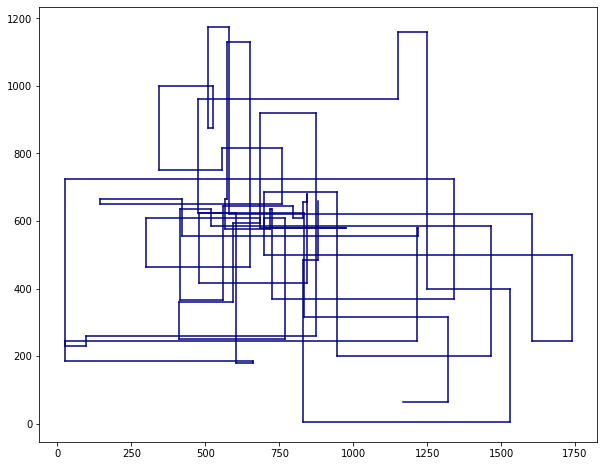

In [67]:
best_score_mk = 100000
for i in range(1000):
    way = np.random.permutation(len(df))
    if dis(way) < best_score_mk:
        best_score_mk = dis(way)
        best_way_mk = way
print(best_score_mk)
vis(best_way_mk, 'navy')

# Random walk

27785


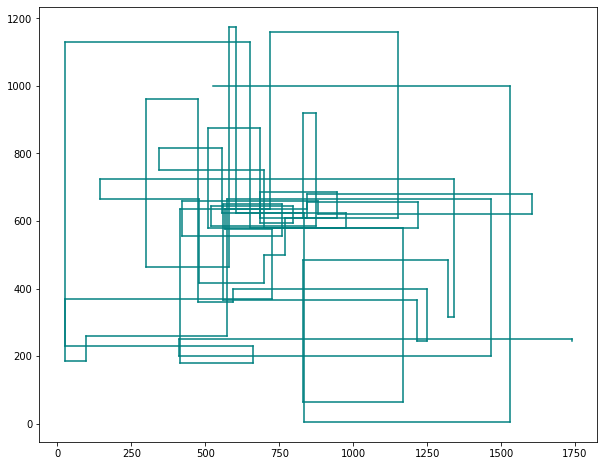

In [69]:
way = [i for i in range(len(df))]
best_score_rw = 100000
for k in range(1000):
    i, j = random.randint(0, len(df) - 1), random.randint(0, len(df) - 1)
    i, j = min(i, j), max(i, j)
    way[i:j] = reversed(way[i:j])
    
    if dis(way) < best_score_rw:
        best_score_rw = dis(way)
        best_way_rw = way
print(best_score_rw)
vis(best_way_rw, 'teal')

# Hill Climb

In [71]:
def hill_climb(way):
    k = 0
    while(k < 1000):
        now_score = dis(way)
        now_best_way = copy.copy(way)
        for i in range(len(df)):
            for j in range(i + 1, len(df)):
                new_way = copy.copy(way)
                new_way[i:j] = reversed(new_way[i:j])
                #new_way[i], new_way[j] = new_way[j], new_way[i]
                now_best_way = now_best_way if dis(now_best_way) < dis(new_way) else copy.copy(new_way)
    
        way = copy.copy(now_best_way)
        if dis(way) == now_score:
            break
        k += 1
    best_way_hc = way
    best_score_hc = dis(best_way_hc)
    return(best_way_hc, best_score_hc)

9570


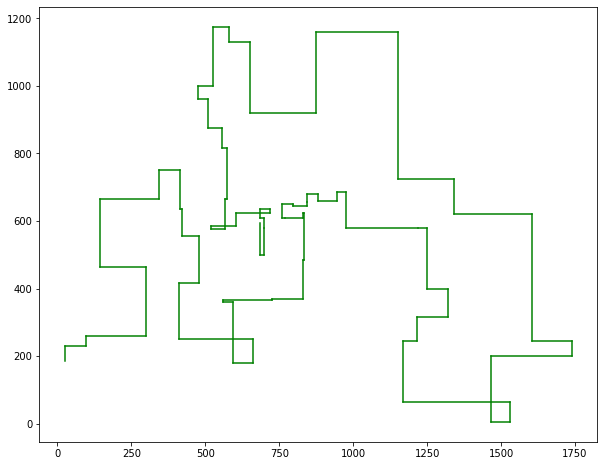

In [80]:
way = list(np.random.permutation(len(df)))
best_way_hc, best_score_hc = hill_climb(way)
print(best_score_hc)
vis(best_way_hc, 'green')

# Simulated annealing

In [565]:
def annealing(way, param):
    t_min, t_max = 0, 200
    t = t_max
    while(t > t_min):
        new_way = copy.copy(way)
        i = random.randint(0, len(df) - 1)
        j = random.randint(i + 1, len(df))
        new_way[i:j] = reversed(new_way[i:j])
        diff = (dis(new_way) - dis(way))/param
        way = copy.copy(new_way) if diff < 0 else (way if random.random() > np.exp(-diff / t) else copy.copy(new_way))
        t -= 0.0005
    return (way, dis(way))

In [559]:
best_way_sa, best_score_sa = annealing(list(np.random.permutation(len(df))), 1)
print(best_score_sa)

8905


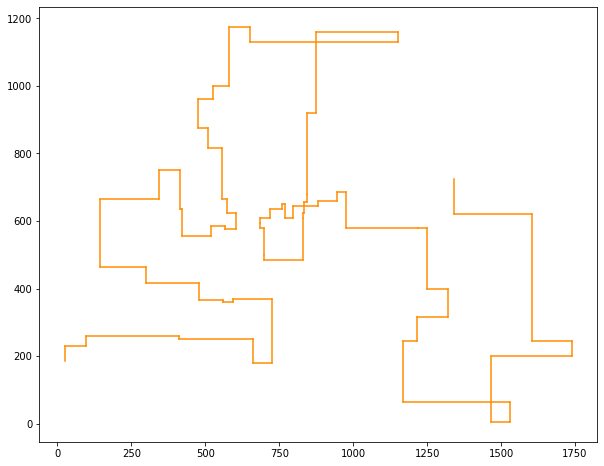

In [77]:
best_way_sa = [1, 6, 41, 29, 28, 15, 49, 19, 22, 20, 16, 2, 17, 30, 21, 0, 48, 31, 44, 18, 40, 7, 8, 9, 32, 42, 14, 4, 23, 47, 45, 43, 33, 34, 35, 38, 39, 36, 37, 5, 3, 24, 11, 27, 26, 25, 46, 13, 12, 51, 10, 50]
vis(best_way_sa, 'darkorange')

# Genetic algorithm

In [691]:
def cross(parent_1, parent_2):
    i = random.randint(0, len(df) - 1)
    j = random.randint(i + 1, len(df))
    child = [i for i in range(len(df))]
    child[i:j] = parent_1[i:j]
    back_child = []
    for k in parent_2[j:len(df)]:
        if k not in child[i:j]:
            back_child.append(k)
    for k in parent_2[0:j]:
        if k not in child[i:j]:
            back_child.append(k)
    child[j:] = back_child[:len(df) - j]
    child[:i] = back_child[len(df) - j:]
    return(child)

def genetic():
    population = []
    for i in range(250):
        way = np.random.permutation(len(df))
        population.append([dis(way), list(way)])
    best_child_ever = best_child = population[0][1]
    best_child_score_ever = population[0][0]
    for _ in range(2000):    
        j = random.randint(25, 220)
        best_pop = sorted(list(population))[:25] + list(population[j:j + 25])
        best_child = population[0][1]
        best_child_score = population[0][0]
        new_population = []
        for k in range(250):
            i, j = random.randint(0, 50-1), random.randint(0, 50-1) 
            child = cross(best_pop[i][1], best_pop[j][1])
            if dis(child) < best_child_score:
                best_child = copy.copy(child)
                best_child_score = dis(child)
            new_population.append([dis(child), child])
        population = copy.copy(new_population)
        if dis(best_child) < dis(best_child_ever):
            best_child_ever = copy.copy(best_child)
            best_child_score_ever = best_child_score
        for k in range(10):
            i, mut_1 = random.randint(0, 250-1), random.randint(0, len(df)-2)
            mut_2 = random.randint(mut_1, len(df)-1)
            population[i][1][mut_1], population[i][1][mut_2] = population[i][1][mut_2], population[i][1][mut_1]
    return(best_child_ever)

In [690]:
best_way_ga = genetic()
print(dis(best_way_ga))
print(best_way_ga)

9565
[1, 6, 41, 29, 20, 30, 17, 16, 2, 8, 9, 7, 40, 18, 44, 31, 48, 0, 21, 22, 19, 49, 28, 15, 43, 33, 34, 35, 38, 23, 45, 47, 36, 39, 37, 4, 14, 5, 3, 24, 11, 27, 26, 25, 46, 13, 12, 51, 10, 50, 32, 42]


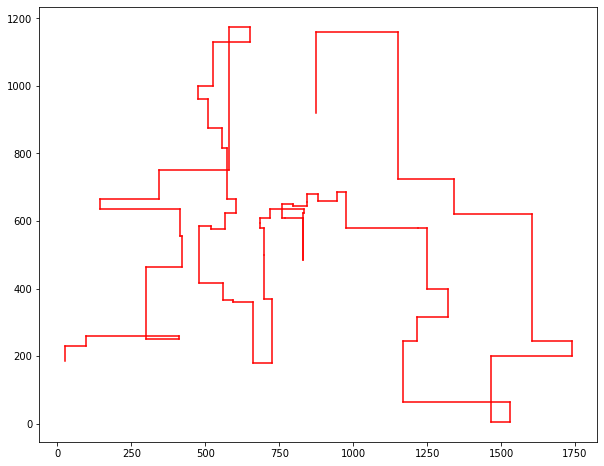

In [76]:
best_way_ga = [1, 6, 41, 29, 20, 30, 17, 16, 2, 8, 9, 7, 40, 18, 44, 31, 48, 0, 21, 22, 19, 49, 28, 15, 43, 33, 34, 35, 38, 23, 45, 47, 36, 39, 37, 4, 14, 5, 3, 24, 11, 27, 26, 25, 46, 13, 12, 51, 10, 50, 32, 42]
vis(best_way_ga, 'r')